In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

np.random.seed(123) #ensure reproducibility
pd.options.mode.chained_assignment = None  #hide any pandas warning

In [2]:
data= pd.read_csv("C:/Users/HP/Downloads/HeartDisease.csv")
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Preparation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.shape

(303, 14)

In [6]:
# Checking for messing values
data.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

<AxesSubplot:>

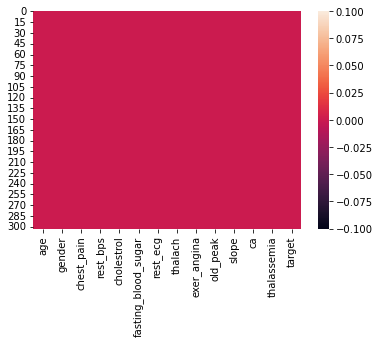

In [7]:
sns.heatmap(data.isnull())

# check duplicate values

In [8]:
data_dup=data.duplicated().any()
data_dup

True

true means our dataset is having duplicate values

In [9]:
data=data.drop_duplicates()
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
data_dup=data.duplicated().any()
data_dup

False

no more duplicate values

In [11]:
data.nunique()

age                     41
gender                   2
chest_pain               4
rest_bps                49
cholestrol             152
fasting_blood_sugar      2
rest_ecg                 3
thalach                 91
exer_angina              2
old_peak                40
slope                    3
ca                       5
thalassemia              4
target                   2
dtype: int64

# Exploratory Data Analysis

In [13]:
data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

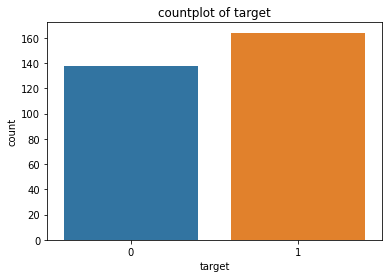

In [14]:
sns.countplot(data.target)
plt.title('countplot of target')
plt.show()

# splitting the data

# seperating categorical & numerical featues

In [6]:
cat_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        cat_val.append(column)
    else:
        cont_val.append(column)

In [7]:
cat_val

['gender',
 'chest_pain',
 'fasting_blood_sugar',
 'rest_ecg',
 'exer_angina',
 'slope',
 'ca',
 'thalassemia',
 'target']

<AxesSubplot:xlabel='gender', ylabel='count'>

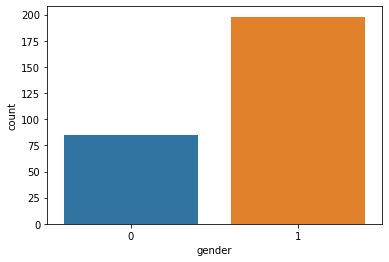

In [130]:
data['gender'].unique()
sns.countplot(data.gender)

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

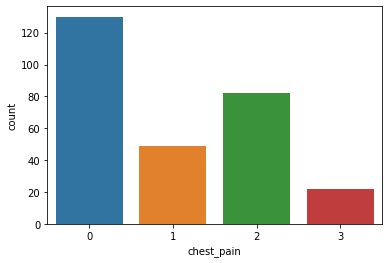

In [131]:
data['chest_pain'].unique()
sns.countplot(data.chest_pain)

<AxesSubplot:xlabel='fasting_blood_sugar', ylabel='count'>

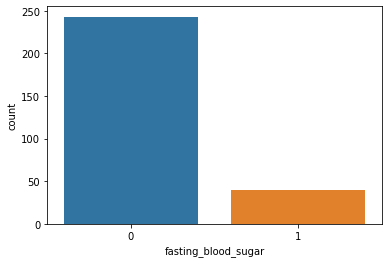

In [132]:
data['fasting_blood_sugar'].unique()
sns.countplot(data.fasting_blood_sugar)


<AxesSubplot:xlabel='rest_ecg', ylabel='count'>

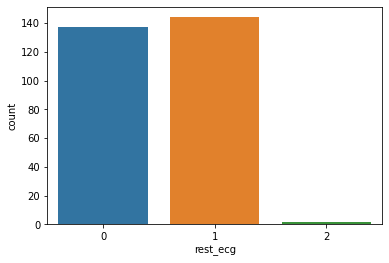

In [133]:
data['rest_ecg'].unique()
sns.countplot(data.rest_ecg)


<AxesSubplot:xlabel='exer_angina', ylabel='count'>

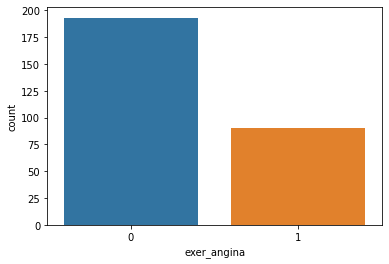

In [134]:
data['exer_angina'].unique()
sns.countplot(data.exer_angina)


<AxesSubplot:xlabel='slope', ylabel='count'>

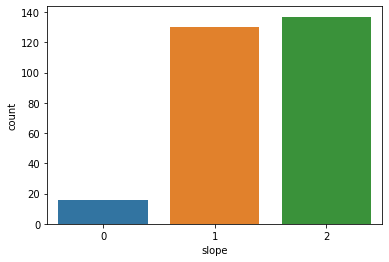

In [135]:
data['slope'].unique()
sns.countplot(data.slope)

<AxesSubplot:xlabel='ca', ylabel='count'>

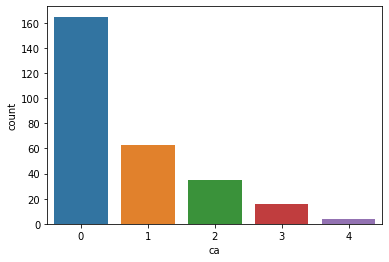

In [136]:
data['ca'].unique()
sns.countplot(data.ca)

<AxesSubplot:xlabel='thalassemia', ylabel='count'>

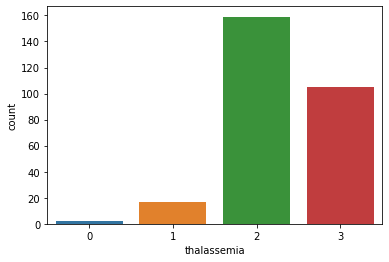

In [137]:
data['thalassemia'].unique()
sns.countplot(data.thalassemia)

# contineous variables

In [98]:
cont_val

['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']

# vishvalisation on categorical features¶

In [8]:
x=data[cat_val]

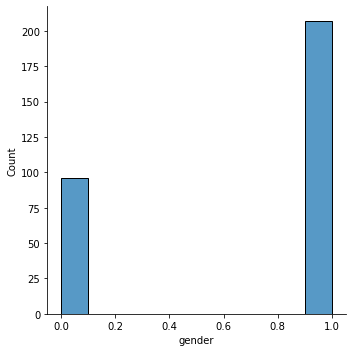

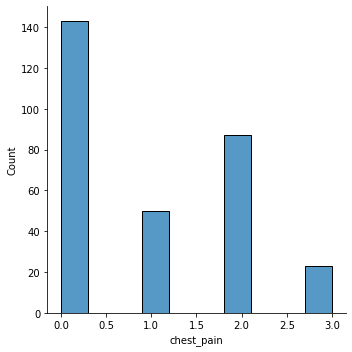

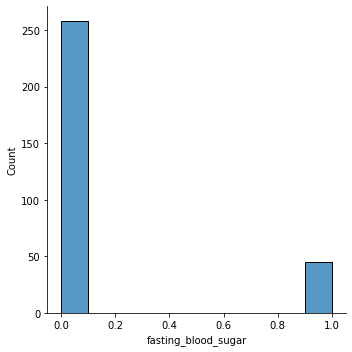

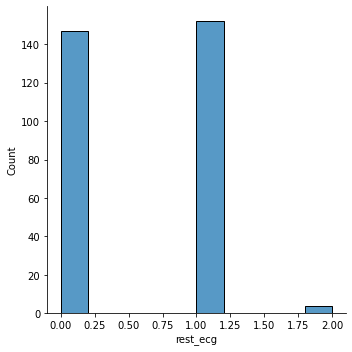

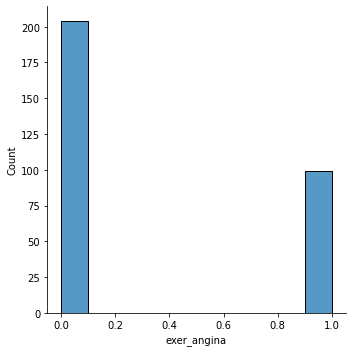

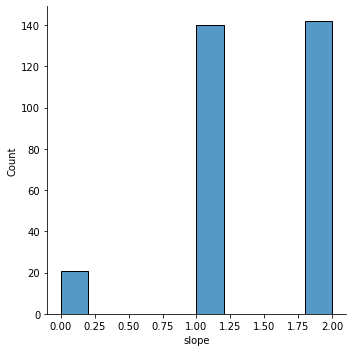

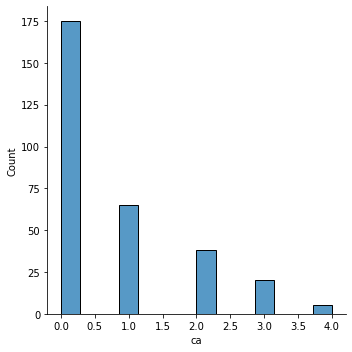

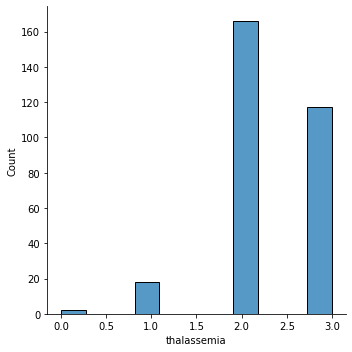

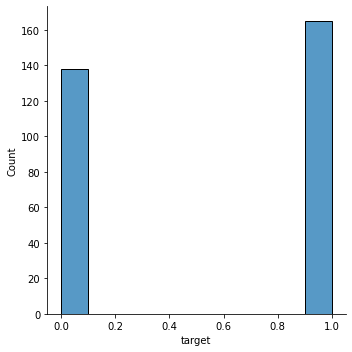

In [9]:
for i in x.columns:
    sns.displot(data[i])
    plt.show()

In [ ]:
#1) gender:1 ie; male has more likely to have heart disease than female
#2) cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than  people with cp equal to 0
#3) fasting_blood_sugar :People with value 0 (No ==> fasting_blood_sugar have heart disease more than people with value 1 
#4) rest_ecg{resting electrocardiographic results} : People with value 1  are more likely to have heart disease. 
#5) exer_angina {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1
#6) slope:People with slope value equal to 2 are more likely to have heart disease than people with slope values 0, 1
#7) ca: {the more blood movement the better} so, people with ca equal to 0 are more likely to have heart disease   
#8) thalassemia:People with thal value equal to 2 are more likely to have heart disease.    

# cat variables wrt target variable

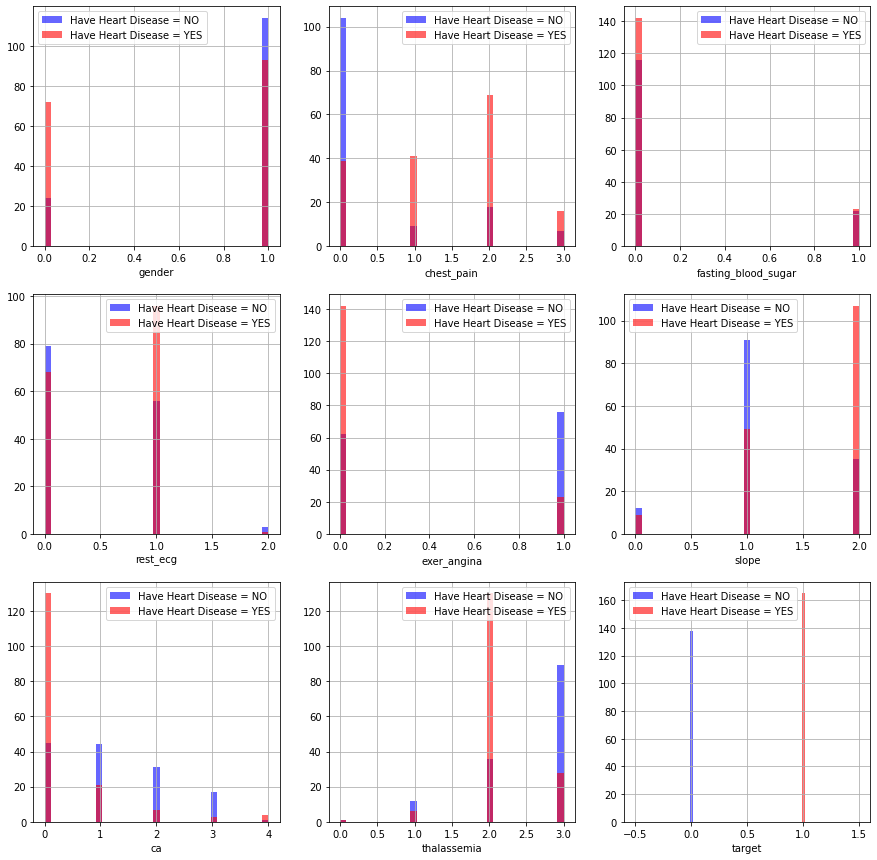

In [10]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cat_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

# vishvalisation on contineous features

In [14]:
y=data[cont_val]

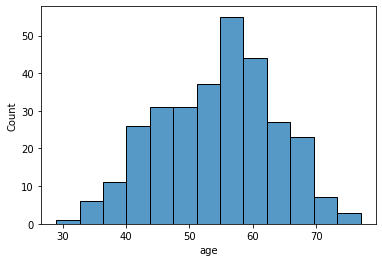

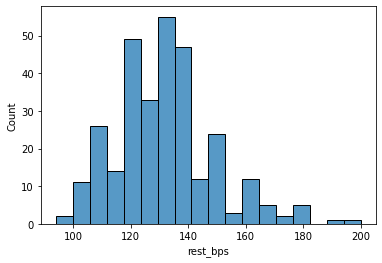

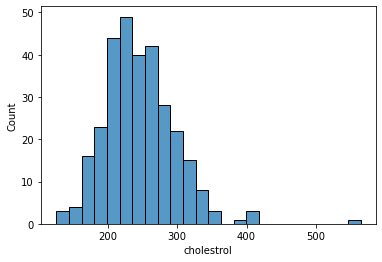

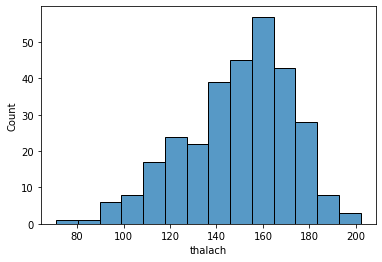

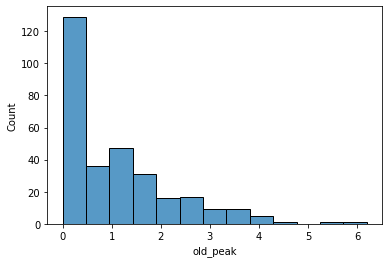

In [22]:
for i in y.columns:
    sns.histplot(data[i])
    plt.show()

# wrt target variable

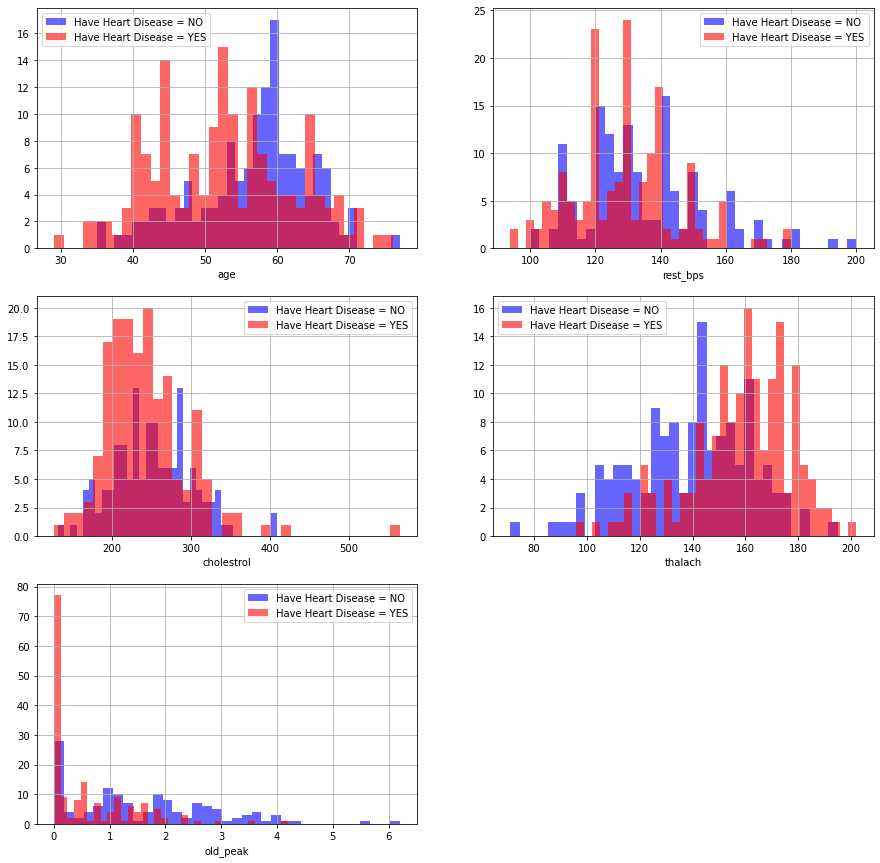

In [19]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cont_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [ ]:
#restbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
#chol {serum cholestoral in mg/dl} : above 200 is cause for concern.
#thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
#oldpeak : "ST depression induced by exercise relative to rest" looks at stress of heart during excercise unhealthy heart will stress more

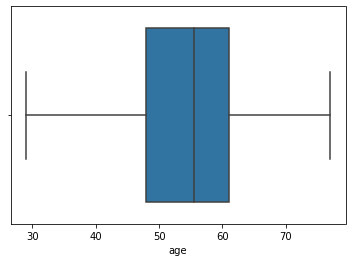

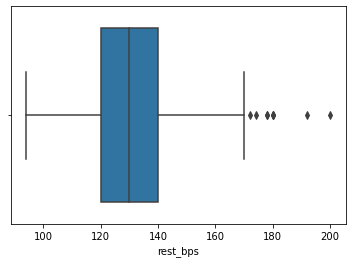

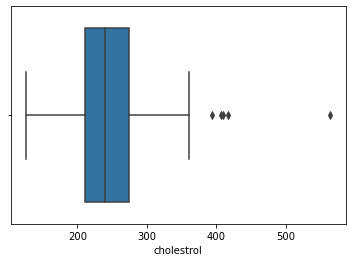

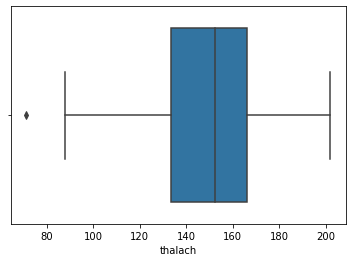

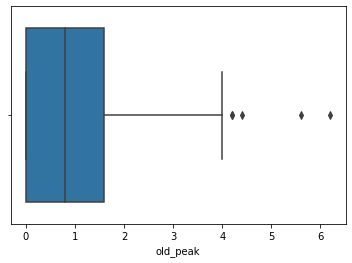

In [15]:
for i in y.columns:
    sns.boxplot(data[i])
    plt.show()

In [16]:
for i in y.columns:
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[i] <min,i] = np.nan
    data.loc[data[i] > max,i] = np.nan

Thus, we have used numpy.percentile() method to calculate the values of Q1 and Q3. Further, we have replaced the outliers with numpy.nan as the NULL values.

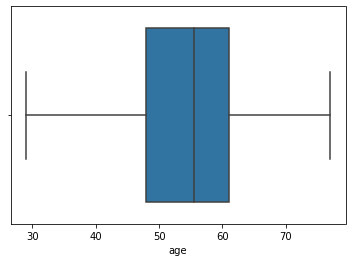

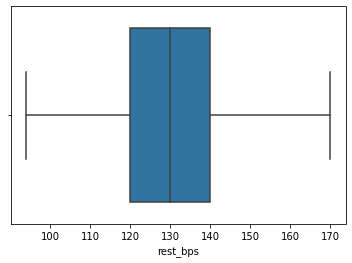

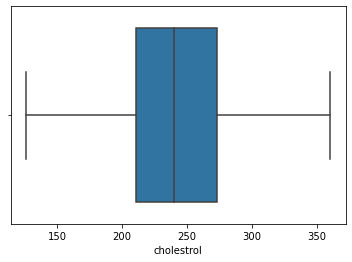

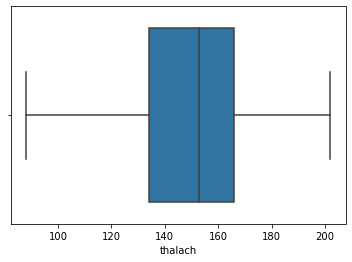

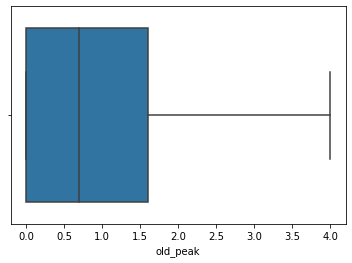

In [17]:
for i in y.columns:
    sns.boxplot(data[i])
    plt.show()

In [18]:
data.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               9
cholestrol             5
fasting_blood_sugar    0
rest_ecg               0
thalach                1
exer_angina            0
old_peak               5
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [19]:
data=data.dropna(axis = 0)

In [20]:
data.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

# SCATTER PLOT OF CONTINEOUS FEATUES

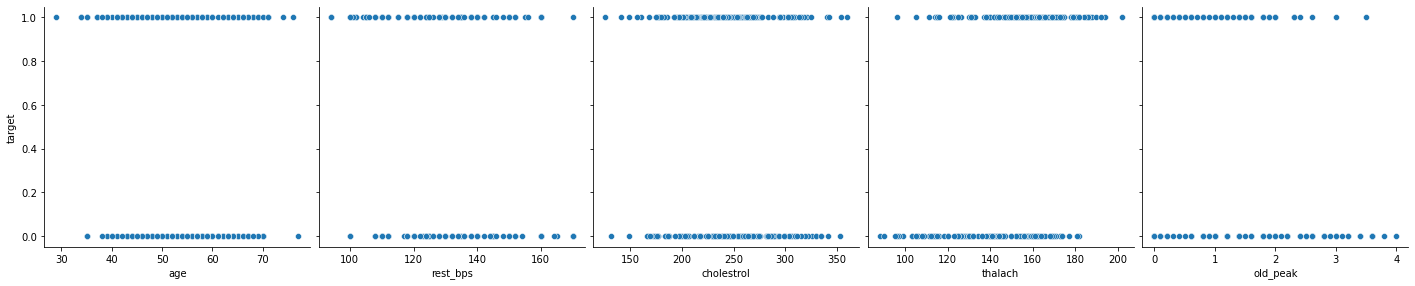

In [122]:
sns.pairplot(data, x_vars=['age', 'rest_bps', 'cholestrol','thalach','old_peak'], y_vars='target', height=4, aspect=1, kind='scatter')



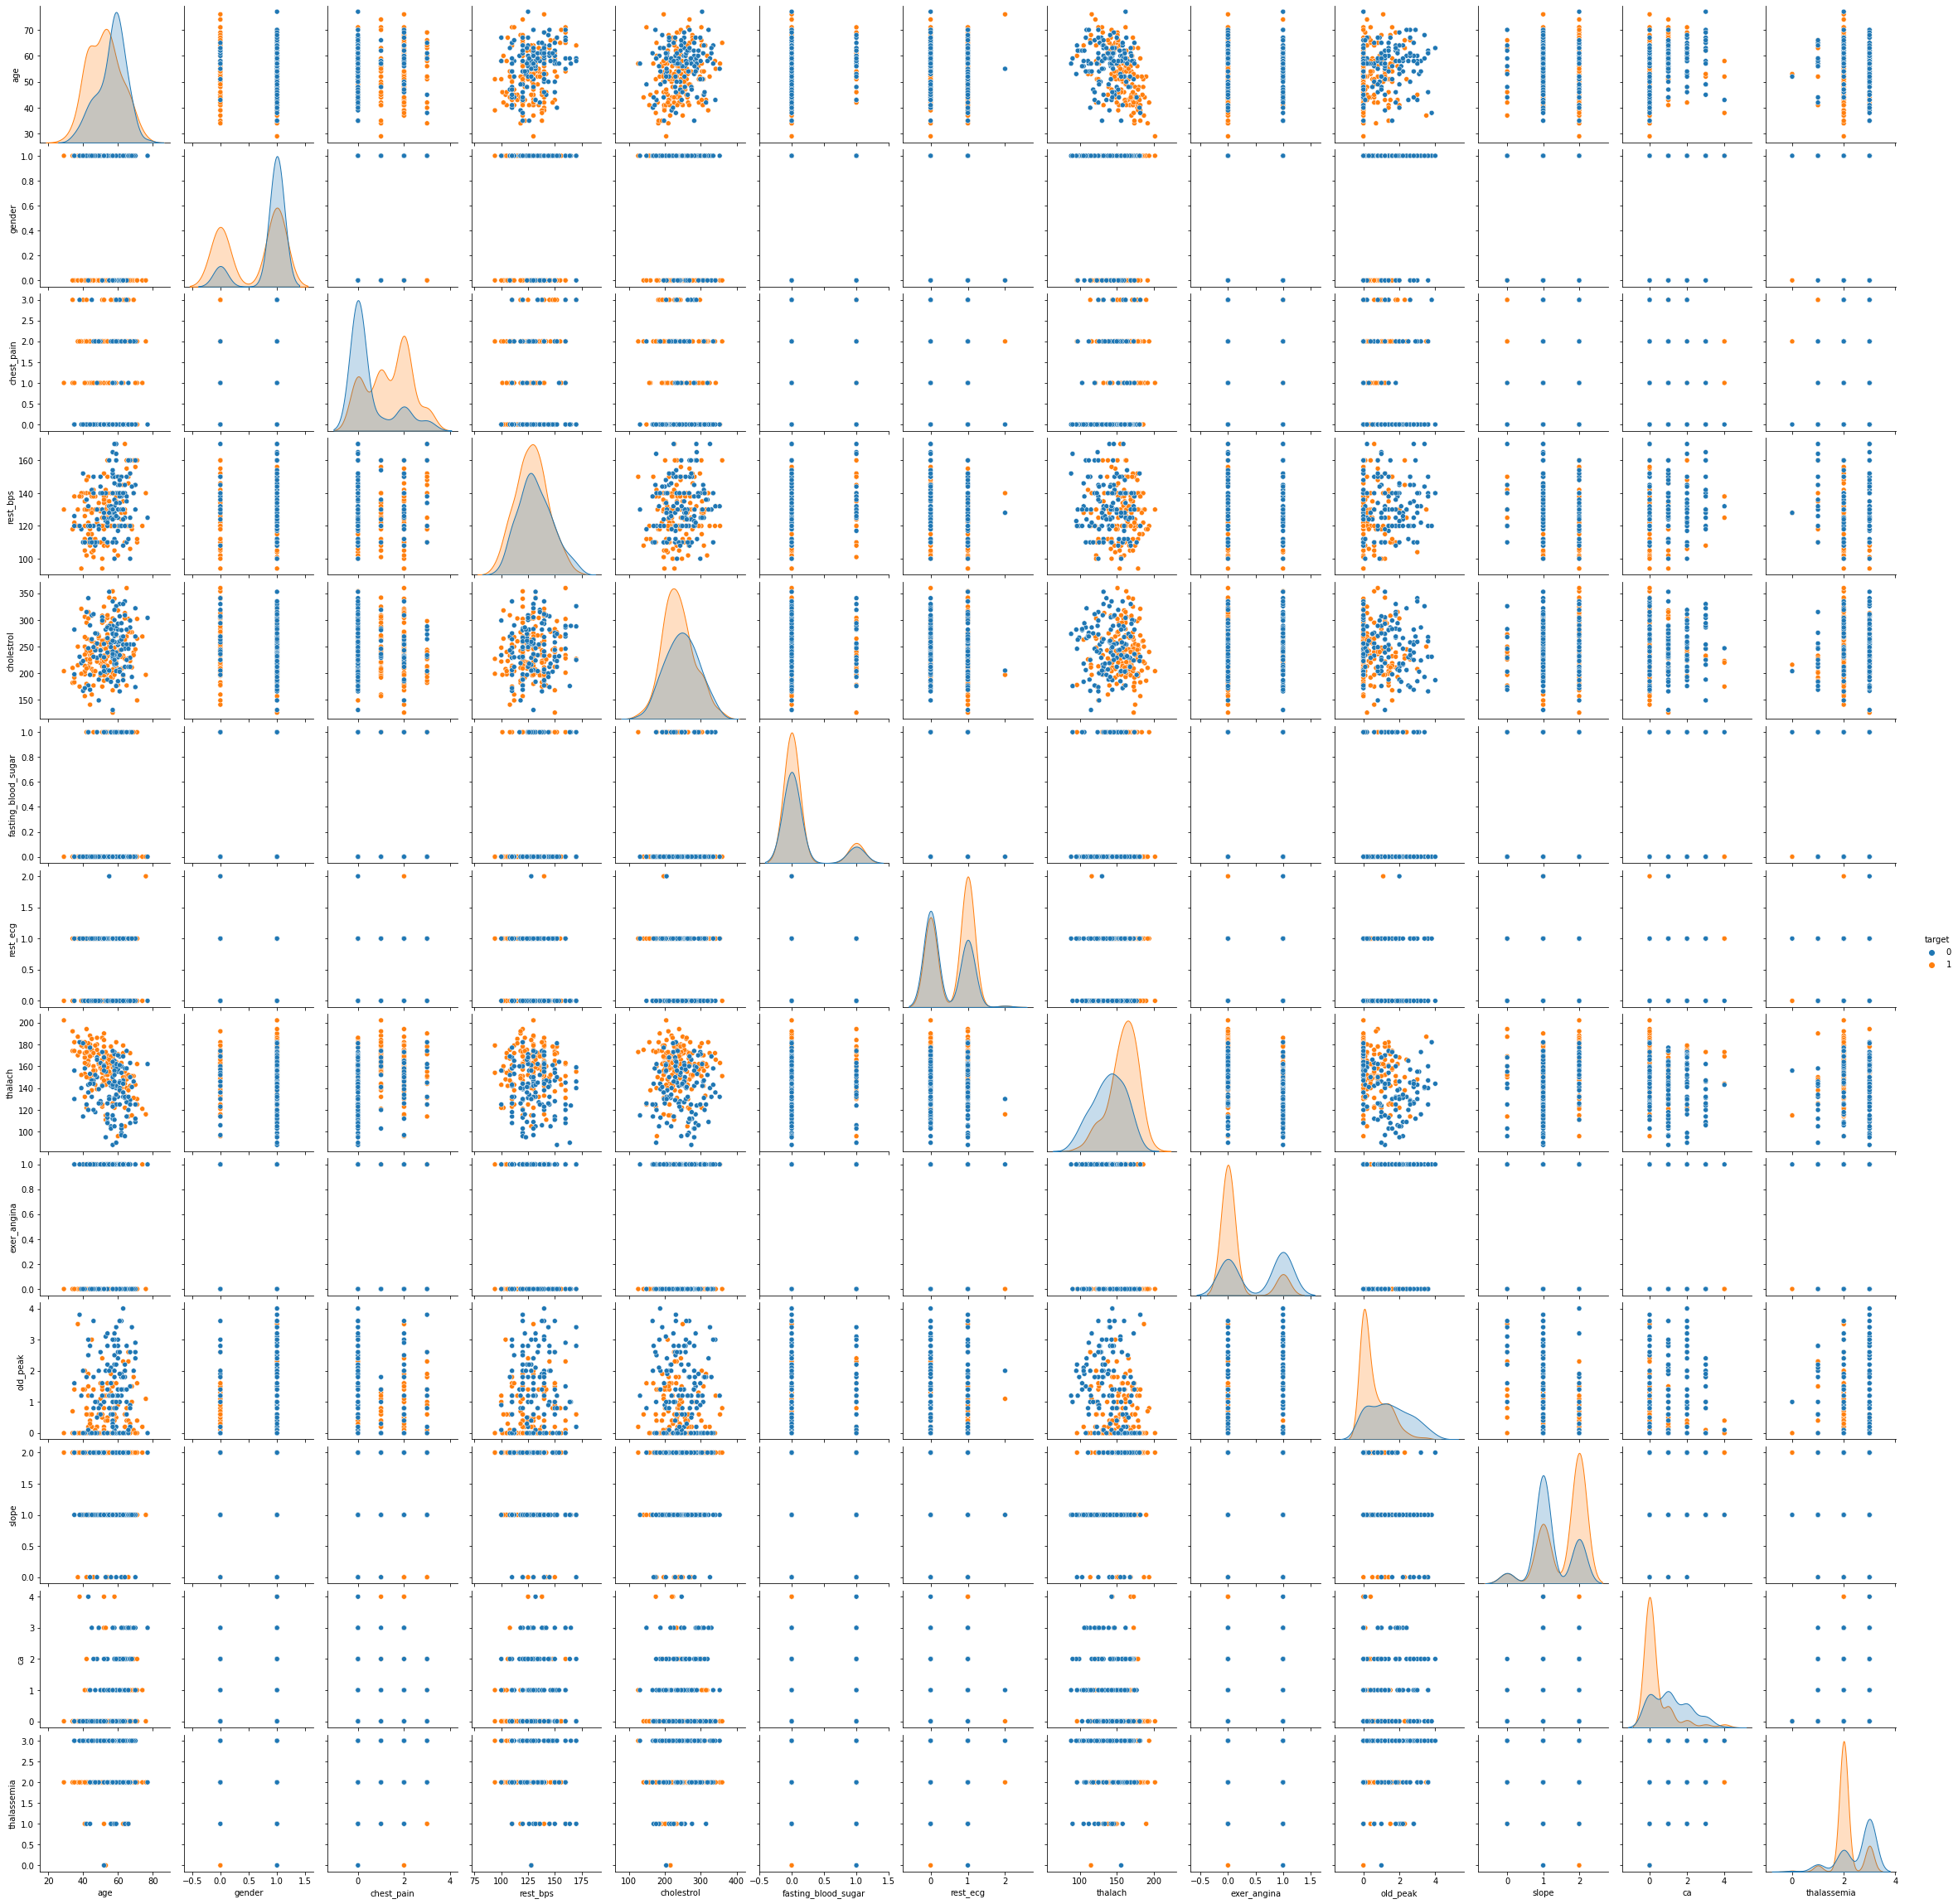

In [123]:
sns.pairplot(data,hue='target')

# heatmap

<AxesSubplot:>

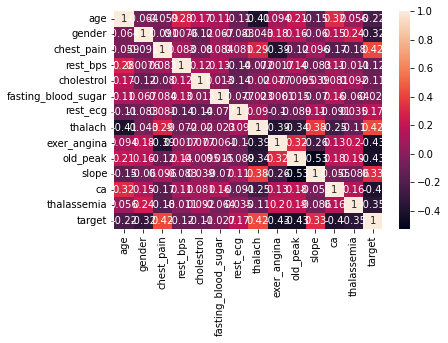

In [109]:
sns.heatmap(data.corr(),annot=True)

summary of the correlation-->
The ones that are more correlated with the target are chest_pain, thalach and slop.

# Correlation Matrix

In [110]:
data.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.064118,-0.058687,0.282669,0.171015,0.106885,-0.110517,-0.411108,0.093718,0.209254,-0.149095,0.320589,0.055908,-0.222416
gender,-0.064118,1.000000,-0.091357,0.007572,-0.123863,0.066692,-0.083290,-0.042981,0.182596,0.157352,-0.060014,0.150209,0.243271,-0.318896
chest_pain,-0.058687,-0.091357,1.000000,0.083242,-0.080369,0.084389,0.080836,0.285605,-0.388610,-0.122582,0.095881,-0.171717,-0.179204,0.416319
rest_bps,0.282669,0.007572,0.083242,1.000000,0.115138,0.127221,-0.139228,-0.071600,0.001726,0.144438,-0.083024,0.105458,-0.011026,-0.115614
cholestrol,0.171015,-0.123863,-0.080369,0.115138,1.000000,0.013066,-0.142285,-0.020128,0.076547,-0.009534,0.039352,0.081070,0.091667,-0.105627
fasting_blood_sugar,0.106885,0.066692,0.084389,0.127221,0.013066,1.000000,-0.077417,-0.023484,0.006080,0.015070,-0.069563,0.156265,-0.064469,-0.027210
rest_ecg,-0.110517,-0.083290,0.080836,-0.139228,-0.142285,-0.077417,1.000000,0.089556,-0.104440,-0.089255,0.111841,-0.091123,0.034684,0.171453
thalach,-0.411108,-0.042981,0.285605,-0.071600,-0.020128,-0.023484,0.089556,1.000000,-0.387726,-0.341190,0.376494,-0.253937,-0.112838,0.422559
exer_angina,0.093718,0.182596,-0.388610,0.001726,0.076547,0.006080,-0.104440,-0.387726,1.000000,0.318620,-0.259780,0.133820,0.202806,-0.431599
old_peak,0.209254,0.157352,-0.122582,0.144438,-0.009534,0.015070,-0.089255,-0.341190,0.318620,1.000000,-0.525142,0.179032,0.189822,-0.434108


# Lets predict good predictors

In [21]:
data.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [125]:
from scipy.stats import ttest_ind

print('Good predictors with p-value :','\n')
GoodPredictors=[]
for i in x.columns:
    a=data[data.target==0]
    b=data[data.target==1]
    test=ttest_ind(a[i],b[i])
    if test.pvalue<0.05:
        print(i,'\n','p-value =',test.pvalue,'\n\n')
        GoodPredictors.append(i)
print('GoodPredictors=',GoodPredictors)

Good predictors with p-value : 

gender 
 p-value = 4.139720496927511e-08 


chest_pain 
 p-value = 2.732427455639863e-13 


rest_ecg 
 p-value = 0.003816249906832269 


exer_angina 
 p-value = 2.867792590342442e-14 


slope 
 p-value = 1.8808002544727182e-08 


ca 
 p-value = 3.64959509893676e-12 


thalassemia 
 p-value = 1.553503746866716e-09 


target 
 p-value = 0.0 


GoodPredictors= ['gender', 'chest_pain', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia', 'target']


# ENCODING CATEGORICAL DATA

To explain the concept of encoding, let me take one column from the list of categorical columns CP (Chest Pain Type) Having four values 0,1,2 and 3. Because of these values in the CP column, some of the machine learning models can understand there are numerical orders between these values. So these models can understand order does matter. But this is not the case. There is no order here. It is just a chest pain type.
So we will convert these CP column values into binary vectors, which means the CP column will be converted into four columns (Also other categorical columns). Why four? Because it has four unique values, if five unique values the five likewise.


In [22]:
data['gender'] =data['gender'].astype('object')
data['chest_pain'] =data['chest_pain'].astype('object')
data['fasting_blood_sugar'] =data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] =data['rest_ecg'].astype('object')
data['exer_angina'] =data['exer_angina'].astype('object')
data['slope'] = data['slope'].astype('object')
data['ca'] =data['ca'].astype('object')
data['thalassemia'] =data['thalassemia'].astype('object')

In [23]:
data.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

# apply dummy to this for Allowing us to use these features properly.

In [24]:
data = pd.get_dummies(data)
data.head()

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_0,gender_1,chest_pain_0,chest_pain_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


From the above output, we can see the binary vectors. These variables are called dummy variables. To create these dummy variables, I have used the get_dummies method of Pandas.

# Machine learning

# spliting into test & train

In [25]:
# Getting features and target
X = data.drop(["target"], axis=1)
y = data["target"]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Logistic Regression
Training and Predicting

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()
logmodel=logmodel.fit(X_train,y_train)

In [37]:
logmodel

LogisticRegression()

now our model is trained

In [38]:
##lets predict our model
y_predlog = logmodel.predict(X_test)
y_predlog

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
#cross tabuation
accuracy=confusion_matrix(y_test,y_predlog)
accuracy

array([[27,  2],
       [ 4, 28]], dtype=int64)

In [41]:
#cross tabuation
pd.crosstab(y_test,y_predlog,margins=True,
            rownames=["Actuals"],colnames=["predict"])

predict,0,1,All
Actuals,,,
0,27,2,29
1,4,28,32
All,31,30,61


In [42]:
from sklearn.metrics import accuracy_score
accuracy=(accuracy_score(y_test,y_predlog)*100)
accuracy


90.1639344262295

# Evaluation
We can check precision,recall,f1-score using classification report!

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,y_predlog))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# IMPORTANCE OF VARIABLE

In [113]:
###IMPORTANCE OF VARIABLE
logmodel.fit(X_train,y_train)
importance = logmodel.coef_[0]
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logmodel.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

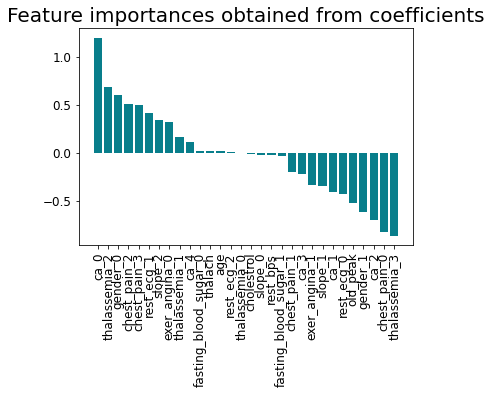

In [114]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

the larger the coefficient is (in both positive and negative direction), the more influence it has on a prediction.

So, it looks like the most important factors in terms of permutation is a ca_0 followed by chest_pain_2 of the patient at the time of examination

# CONCLUSION:
The Logistic Regression algorithm gives us the maximum Accuracy (88% approx)

# NON-LINEAR ALGORITHM
--->NO PRE-PROCESSING REQUIRED IE; NO ENCODING & FEATURING SCALING IS REQUIRED

# DECISION TREE CLASSIFIER

In [28]:
data= pd.read_csv("C:/Users/HP/Downloads/HeartDisease.csv")
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
data=data.drop_duplicates()
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [30]:
data.shape

(302, 14)

# spliting into test & train

In [31]:
# Getting features and target
X = data.drop(["target"], axis=1)
y = data["target"]

In [32]:
#Importing Packages for Classification algorithms
from sklearn.tree import DecisionTreeClassifier

In [33]:
##Training
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
from sklearn import tree 

[Text(0.5059523809523809, 0.9444444444444444, 'X[28] <= 0.5\ngini = 0.491\nsamples = 226\nvalue = [98, 128]'),
 Text(0.25595238095238093, 0.8333333333333334, 'X[7] <= 0.5\ngini = 0.383\nsamples = 97\nvalue = [72, 25]'),
 Text(0.13095238095238096, 0.7222222222222222, 'X[19] <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [16, 18]'),
 Text(0.07142857142857142, 0.6111111111111112, 'X[23] <= 0.5\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.047619047619047616, 0.5, 'X[8] <= 0.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.023809523809523808, 0.3888888888888889, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.07142857142857142, 0.3888888888888889, 'X[4] <= 0.15\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.047619047619047616, 0.2777777777777778, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.09523809523809523, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.19

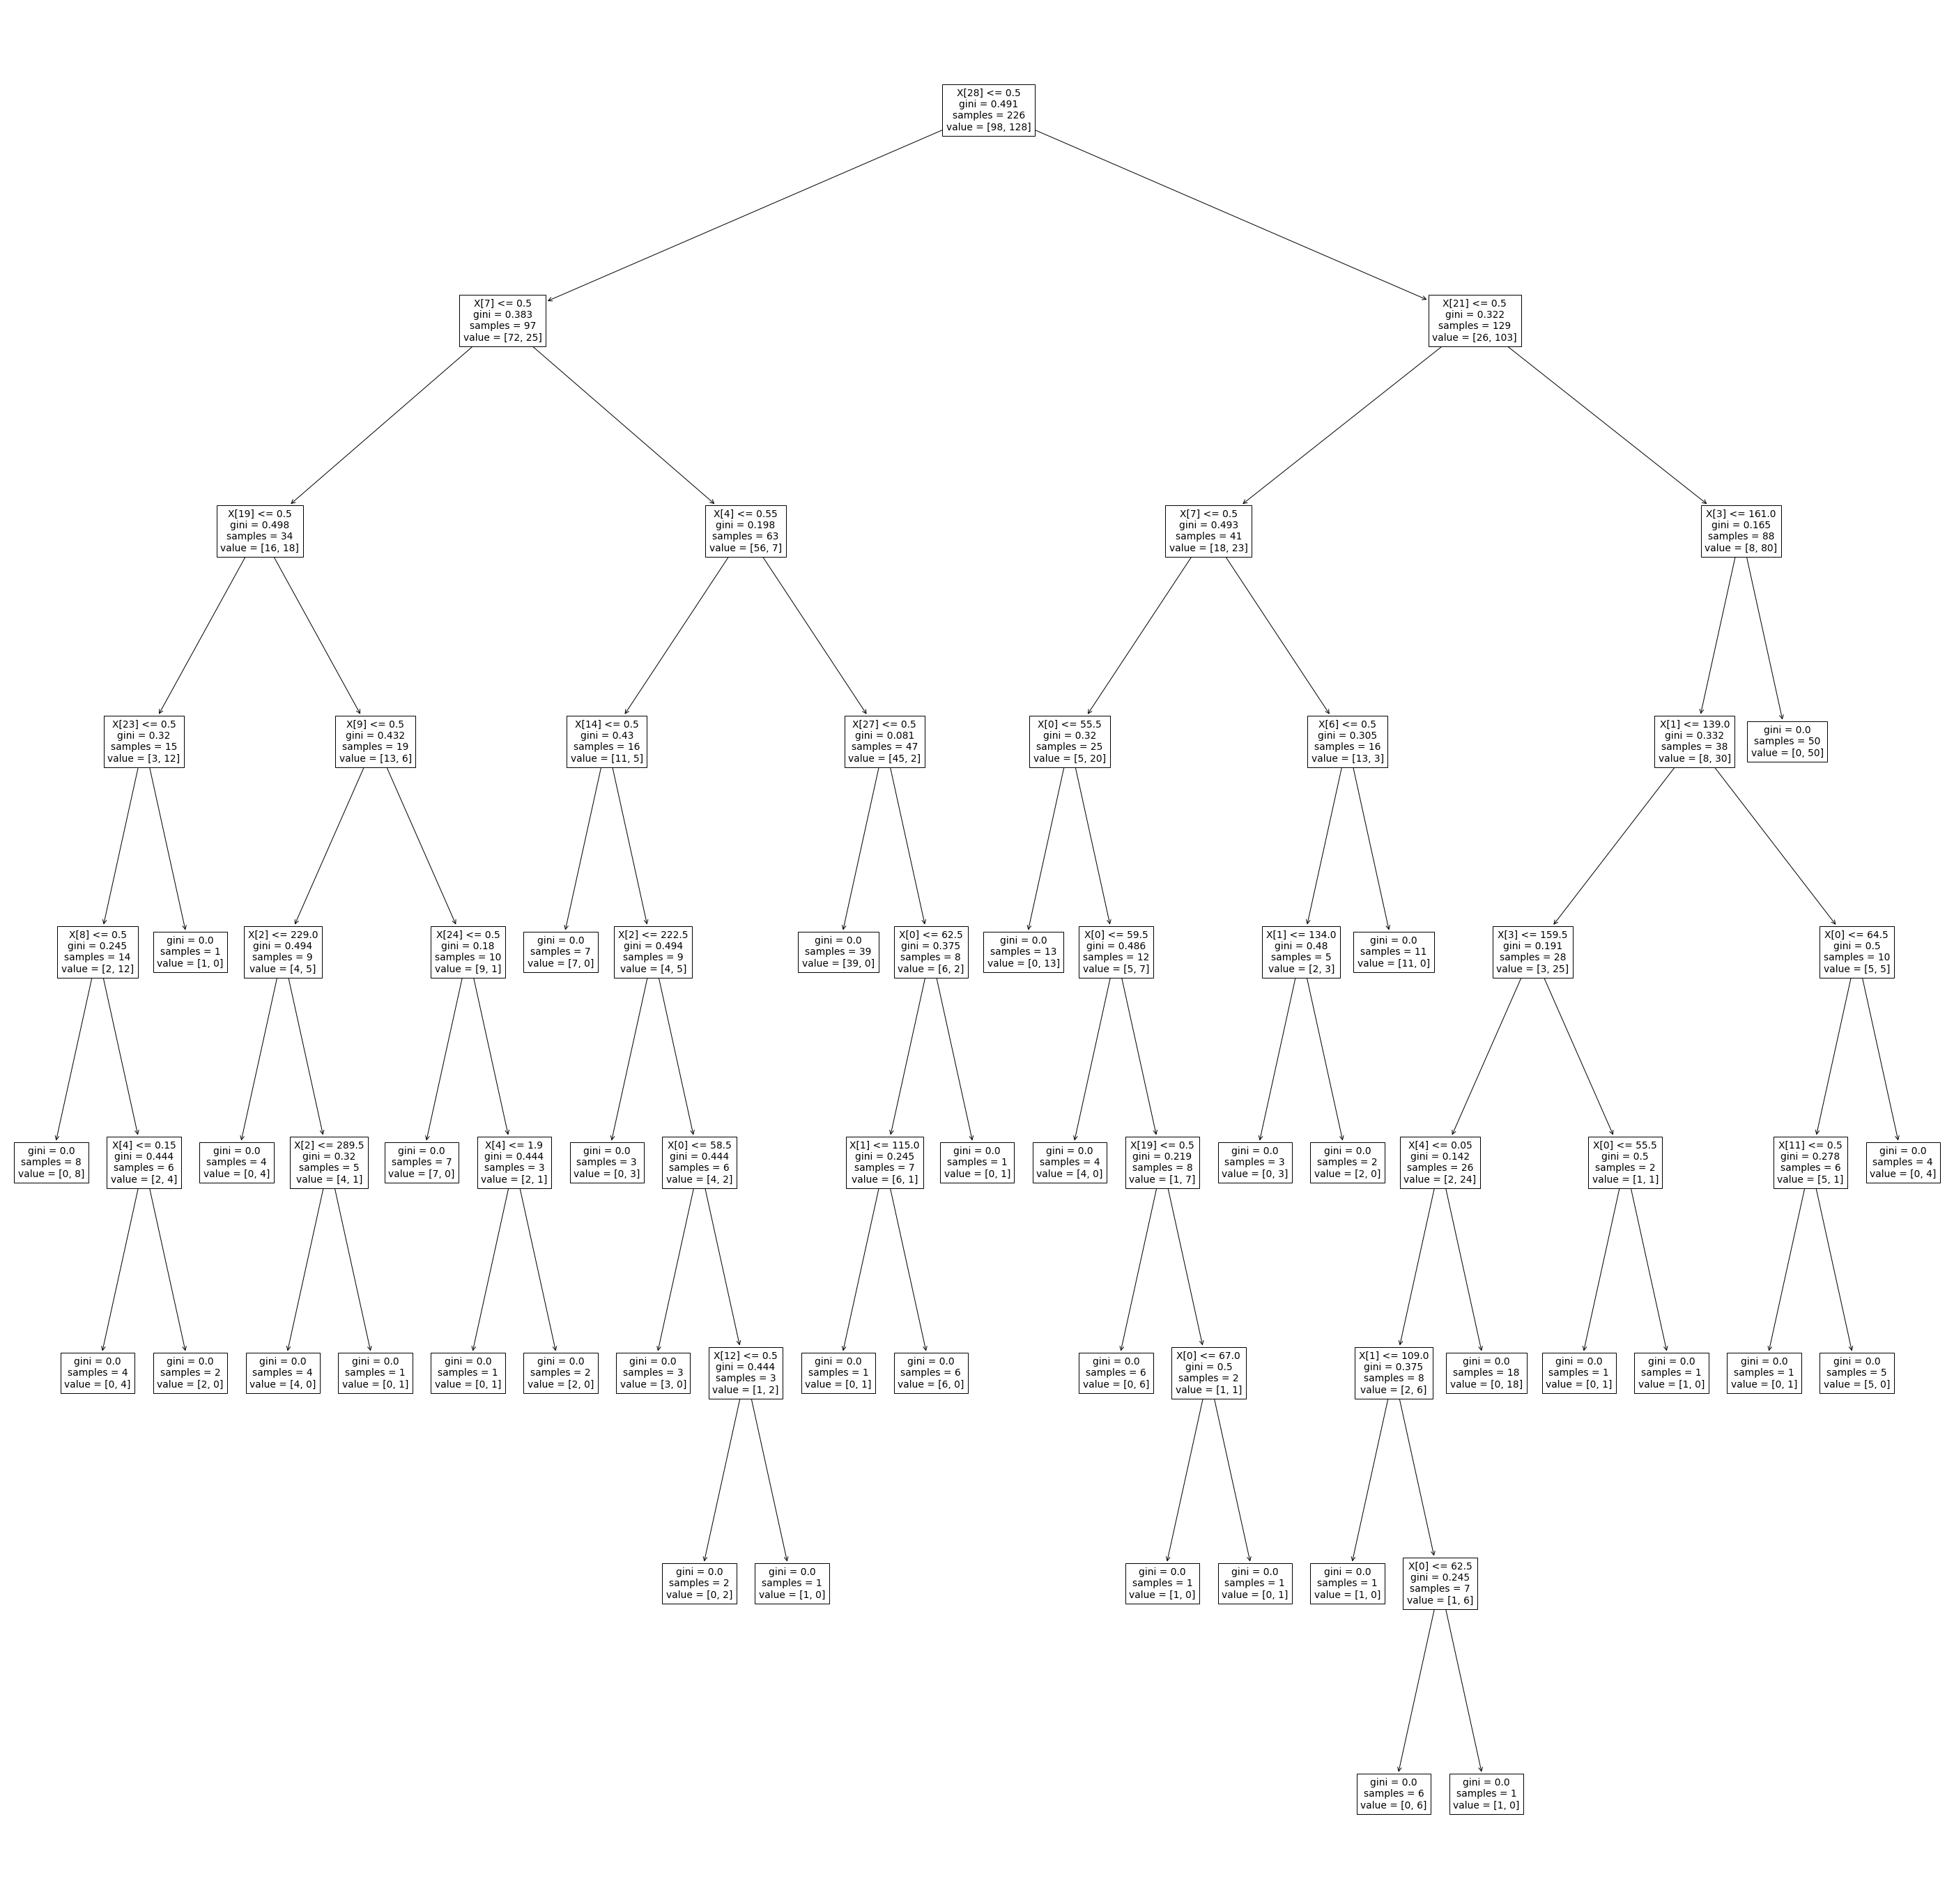

In [70]:
plt.figure(figsize=(50,50))
tree.plot_tree(dt)

In [43]:
##lets predict our model
y_predt = dt.predict(X_test)

In [44]:
#cross tabuation
accuracy=confusion_matrix(y_test,y_predt)
accuracy

array([[25,  4],
       [ 7, 25]], dtype=int64)

In [45]:
#cross tabuation
pd.crosstab(y_test,y_predt,margins=True,
            rownames=["Actuals"],colnames=["predict"])

predict,0,1,All
Actuals,,,
0,25,4,29
1,7,25,32
All,32,29,61


In [50]:
accuracy=(accuracy_score(y_test,y_predt)*100)
accuracy

81.9672131147541

# evaluation

In [51]:
print(classification_report(y_test,y_predt))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# Roc curve

In [52]:
from sklearn.metrics import roc_curve, auc, roc_auc_score 

In [53]:
#why prob is needed?
y_prob = dt.predict_proba(X_test)[:,1]
y_prob

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

true_positive_rate & false_positive_rate  are calculated from threshold on y_prob

In [55]:
true_positive_rate

array([0.     , 0.78125, 1.     ])

In [56]:
thresholds

array([2., 1., 0.])

In [57]:
false_positive_rate

array([0.        , 0.13793103, 1.        ])

In [58]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8216594827586207

Text(0.5, 0, 'False Positive Rate')

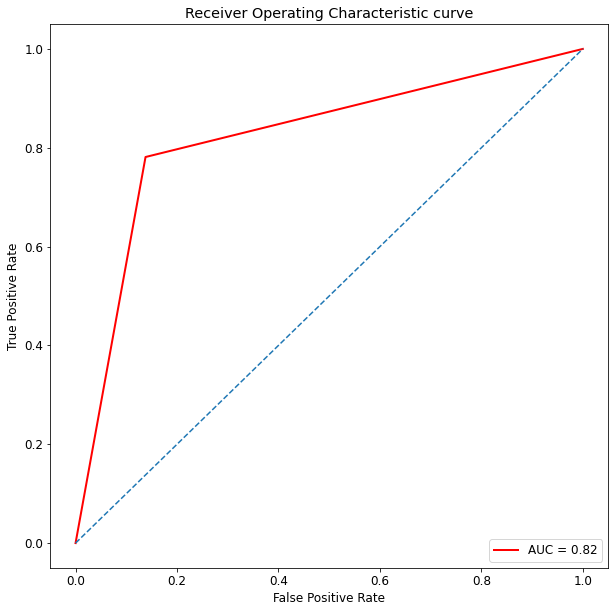

In [72]:
##ROC CURVE PLOT

plt.figure(figsize=(10,10))
lw=2
plt.title('Receiver Operating Characteristic curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',lw=lw,label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [75]:
###IMPORTANCE OF VARIABLE
fdt=pd.DataFrame({'feature':list(X_train.columns),
                 'importance':dt.feature_importances_}).\
                  sort_values('importance',ascending=False)

In [76]:
fdt.head()

,feature,importance
28,thalassemia_2,0.255987
7,chest_pain_0,0.111247
0,age,0.108966
4,old_peak,0.091430
21,ca_0,0.081599


# CONCLUSION:
DecisionTree Classifier gives us the maximum Accuracy & roc :82%

# Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score 

In [110]:
##create the model with 100 trees
rf=RandomForestClassifier(n_estimators=100,bootstrap=100,max_features='sqrt')

In [111]:
rffit=rf.fit(X_train,y_train)
rffit

RandomForestClassifier(bootstrap=100, max_features='sqrt')

In [112]:
##actual class prediction
y_predRF=rffit.predict(X_test)

In [113]:
len(y_predRF)

61

In [114]:
##prediction
y_predRF


array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [115]:
#cross tabuation
accuracy=confusion_matrix(y_test,y_predRF)
accuracy

array([[26,  3],
       [ 5, 27]], dtype=int64)

In [116]:
#cross tabuation
pd.crosstab(y_test,y_predRF,margins=True,
            rownames=["Actuals"],colnames=["predict"])

predict,0,1,All
Actuals,,,
0,26,3,29
1,5,27,32
All,31,30,61


In [117]:
accuracy=(accuracy_score(y_test,y_predRF)*100)
accuracy


86.88524590163934

# evaluation

In [118]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [119]:
####PROB FOR EACH CLASS
predP_RF=rffit.predict_proba(X_test)[:,1]

In [120]:
predP_RF ##prob

array([0.09, 0.49, 0.49, 0.06, 0.8 , 0.82, 0.66, 0.03, 0.06, 0.63, 0.67,
       0.35, 0.93, 0.12, 0.96, 0.98, 0.98, 0.09, 0.02, 0.06, 0.46, 0.05,
       0.7 , 0.77, 0.69, 0.68, 0.79, 0.71, 0.14, 0.88, 0.02, 0.04, 0.02,
       0.33, 0.6 , 0.09, 0.55, 0.73, 0.52, 0.85, 0.91, 0.82, 0.89, 0.67,
       0.65, 0.19, 0.47, 1.  , 0.09, 0.04, 0.14, 0.15, 0.6 , 0.82, 0.17,
       0.18, 0.41, 0.96, 0.13, 0.01, 0.21])

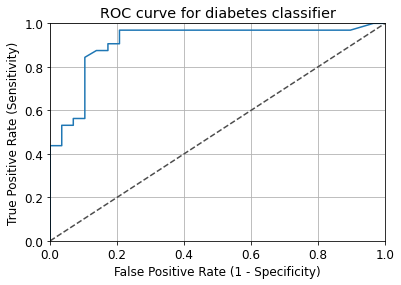

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, predP_RF)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [162]:
###IMPORTANCE OF VARIABLE
franfo=pd.DataFrame({'feature':list(X_train.columns),
                 'importance':rffit.feature_importances_}).\
                  sort_values('importance',ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [74]:
franfo.head()

,feature,importance
4,old_peak,0.094935
3,thalach,0.090864
21,ca_0,0.081822
7,chest_pain_0,0.075803
0,age,0.070269


# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
##normalisation
from sklearn.preprocessing import StandardScaler


In [79]:
scaler=StandardScaler()
scaler.fit(X_test)


StandardScaler()

In [80]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [81]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model = knn.fit(X_train, y_train)

In [82]:
knn_model

KNeighborsClassifier(weights='distance')

In [83]:
y_predknn = knn_model.predict(X_test)
y_predknn

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [84]:
accuracy=confusion_matrix(y_test,y_predknn)
accuracy

array([[26,  3],
       [ 5, 27]], dtype=int64)

In [85]:
# Evaluate model performance
# accuracy
(knn_model.score(X_test, y_test)*100)

86.88524590163934

# evaluation

In [86]:
print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# CONCLUSION:
KNN Classifier gives us the maximum Accuracy & roc :87%

# Compare all of the models and justify your choice about the optimum model.

In [87]:
knn= metrics.accuracy_score(y_test, y_predknn)*100
knn

86.88524590163934

In [88]:
RF= metrics.accuracy_score(y_test, y_predRF)*100
RF

86.88524590163934

In [89]:
DT= metrics.accuracy_score(y_test, y_predt)*100
DT

81.9672131147541

In [90]:
LogReg=metrics.accuracy_score(y_test, y_predlog)*100
LogReg

90.1639344262295

# optimum model is Logistic Regression  with an accuracy of 90.2%

# PREDITING NEW PATIENTS

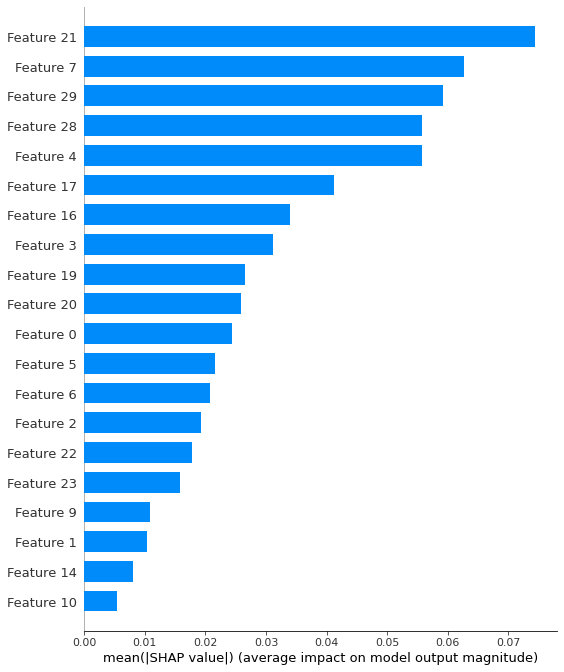

In [160]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

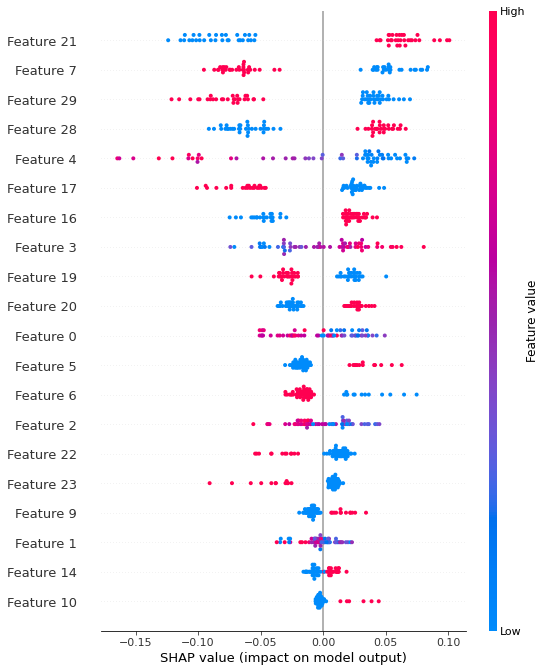

In [161]:
shap.summary_plot(shap_values[1], X_test)

The feature 21 is ca_0 is pretty clear, and it's saying that low values are bad (blue on the right). 

In [107]:
##patient 1-->rf

In [157]:
def heart_disease_risk_factors(dt, patient):

    explainer = shap.TreeExplainer(dt)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [158]:
data_for_prediction = X_test[40,:].astype(float)
heart_disease_risk_factors(rf, data_for_prediction)

 For this person, their prediction is 91% 
Let's check another,

In [ ]:
##patient 2-->rf

In [154]:
data_for_prediction = X_test[10].astype(float)
heart_disease_risk_factors(rf, data_for_prediction)

For this person, their prediction is 67% 